In [13]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [14]:
# Generate datasets
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropic distributed data (Dữ liệu phân phối dị hướng)
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Set up DBSCAN parameters
params = {
    "eps": 0.3,  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
    "min_samples": 7,  # The number of samples in a neighborhood for a point to be considered as a core point
}

# List of datasets and their specific parameters
datasets = [
    (noisy_circles, {}),
    (noisy_moons, {}),
    (varied, {"eps": 0.18}),
    (aniso, {"eps": 0.15}),
    (blobs, {}),
    (no_structure, {}),
]

run time: 0.004015922546386719s


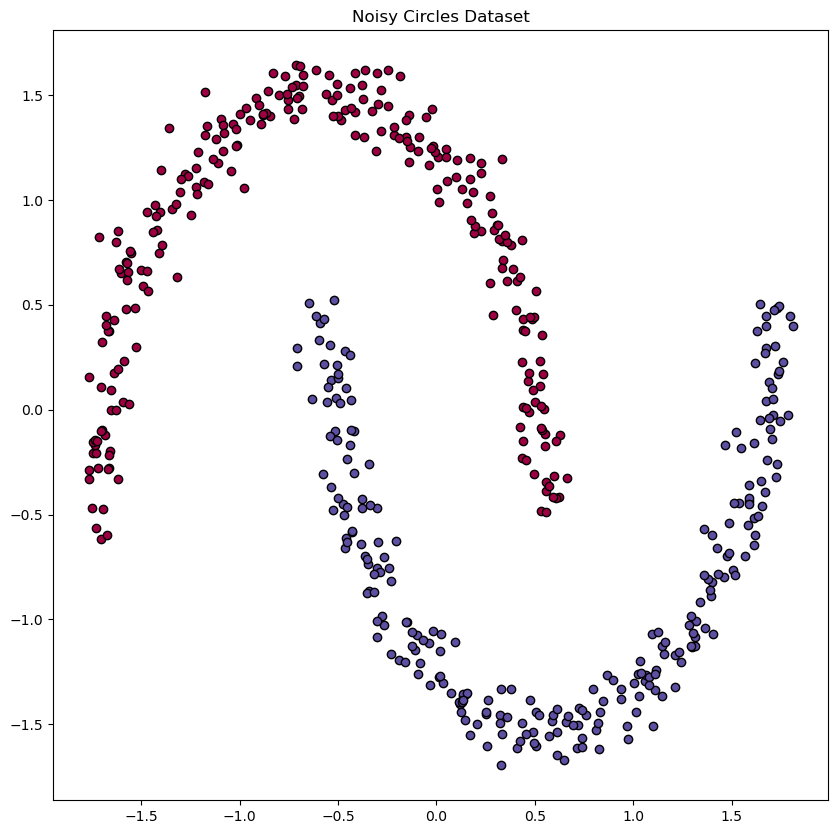

In [24]:
# Extract the noisy_circles dataset from the datasets list
X, y = datasets[1][0]

# Normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = cluster.DBSCAN(eps=params["eps"], min_samples=params["min_samples"])
dbscan.fit(X)

# Measure run time for Hierarchical Clustering
start_time = time.time()
db_labels = dbscan.fit(X)
db_time = time.time() - start_time
print(f"run time: {db_time}s")

# Plot result
plt.figure(figsize=(10, 10))
plt.title("Noisy Circles Dataset")


labels = dbscan.labels_

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & (labels == k)]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)
    
plt.show()

# Hierarchical Clustering

In [25]:
# Import the HierarchicalClustering class
from HierarchicalClustering import HierarchicalClustering

# Extract the noisy_moons dataset from the datasets list
X, y = datasets[1][0]

# Normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Create an instance of HierarchicalClustering
hc = HierarchicalClustering(k=2)

# Apply Hierarchical Clustering
# Measure run time for Hierarchical Clustering
start_time = time.time()
hc_labels = hc.fit(X)
hc_time = time.time() - start_time

**Show Result**

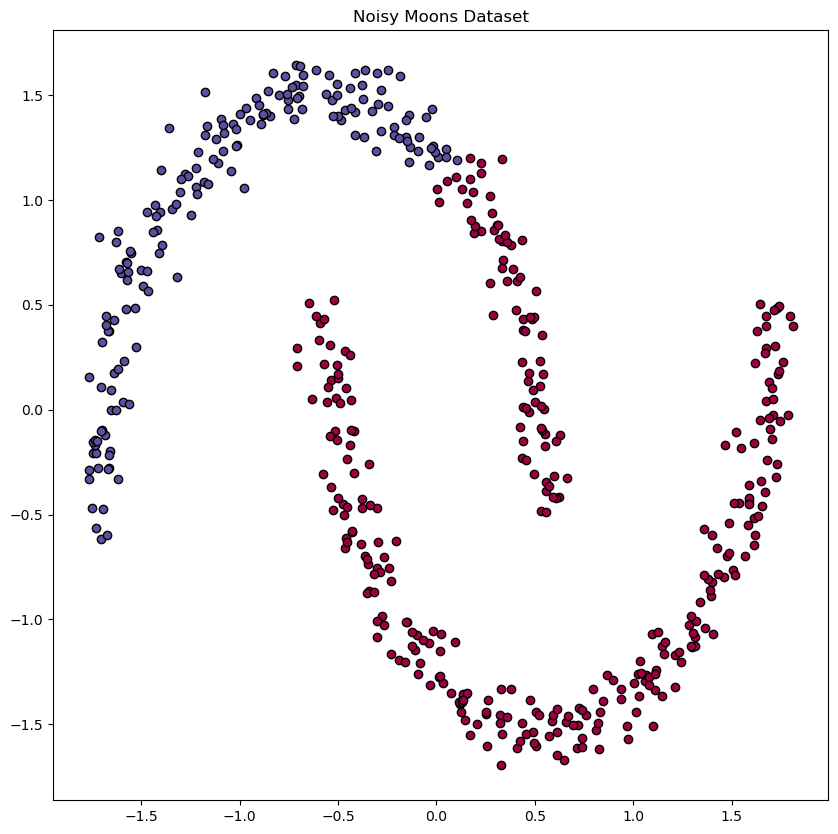

In [26]:
# Plot result
plt.figure(figsize=(10, 10))
plt.title("Noisy Moons Dataset")

# Black removed and is used for noise instead.
unique_labels = set(hc_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = hc_labels == k

    xy = X[class_member_mask & (hc_labels == k)]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

plt.show()

# K-Means

In [27]:
from KMean import KMeansClustering

# Extract the noisy_moons dataset from the datasets list
X, y = datasets[1][0]

# Normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Create an instance of HierarchicalClustering
km = KMeansClustering(k=2)
# Measure run time for KMeans Clustering
start_time = time.time()
km_labels = km.fit(X, max_iter=250)
km_time = time.time() - start_time



shape: (500, 2)


**Show Result** 

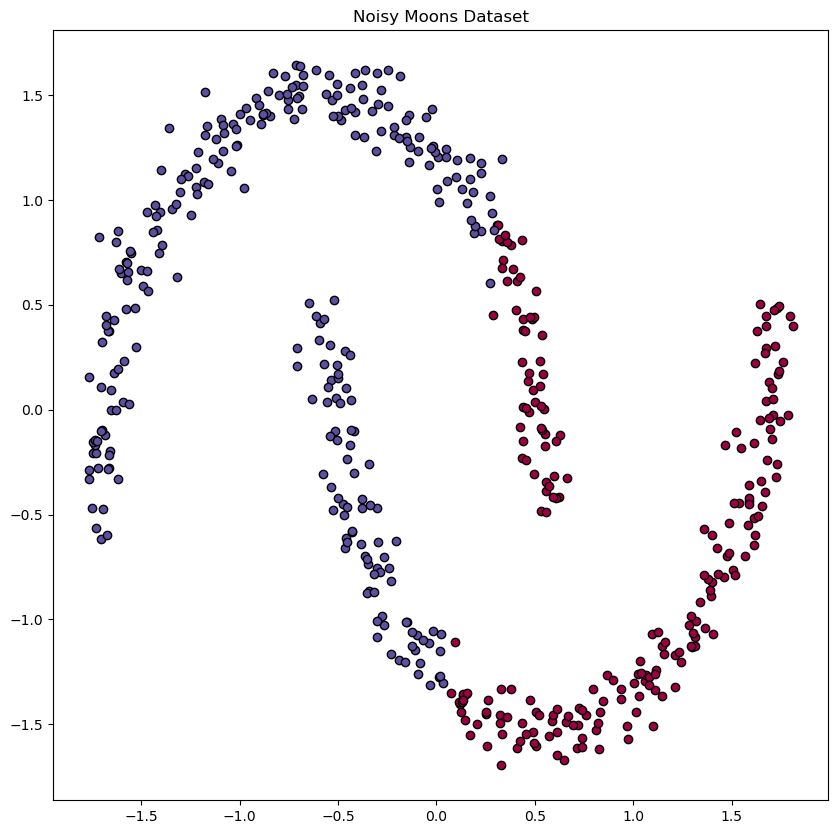

In [28]:
# Plot result
plt.figure(figsize=(10, 10))
plt.title("Noisy Moons Dataset")

# Black removed and is used for noise instead.
unique_labels = set(km_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = km_labels == k

    xy = X[class_member_mask & (km_labels == k)]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

plt.show()

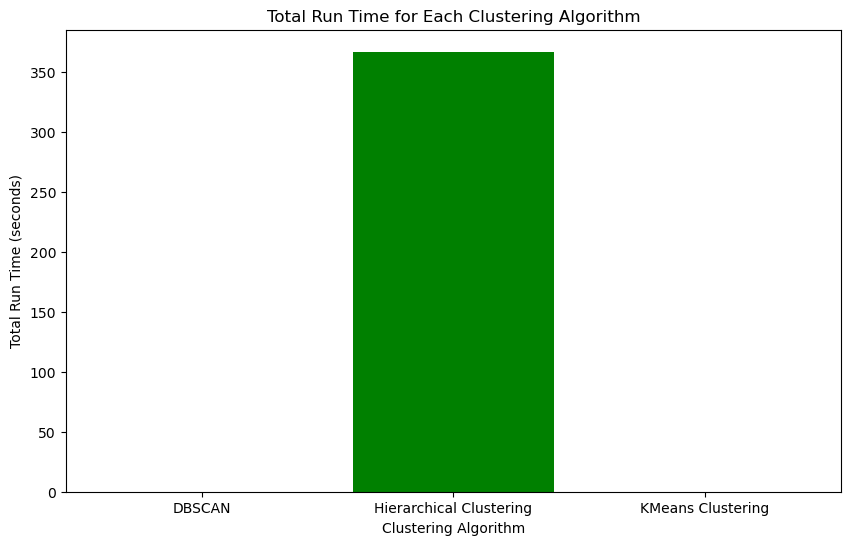

In [29]:
# Plot total run time for each clustering algorithm
algorithms = ['DBSCAN', 'Hierarchical Clustering', 'KMeans Clustering']
times = [db_time, hc_time, km_time]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, times, color=['red', 'blue', 'green'])
plt.xlabel('Clustering Algorithm')
plt.ylabel('Total Run Time (seconds)')
plt.title('Total Run Time for Each Clustering Algorithm')
plt.show()